Reading the ARFF File

In [35]:
from scipy.io.arff import loadarff
import pandas as pd, numpy as np

data = loadarff('column_diagnosis.arff')
df = pd.DataFrame(data[0])
df['class'] = df['class'].str.decode('utf-8')

**Question 1**

Separate the features and the output to use the "f_classif" function and place the f-value and p-value in a table to assess discriminative power.

In [36]:
from sklearn.feature_selection import f_classif

variables = df.drop('class', axis=1)
target = df['class']

fvalues, pvalues = f_classif(variables, target)

fvalue_df = pd.DataFrame({'variable': variables.columns, 'fvalues': fvalues, 'pvalues': pvalues})
print(fvalue_df.head(6))

print("\nthe variable with the highest f-value is degree_spondylolisthesis")
print("the variable with the lowest f-value is pelvic_radius")

                   variable     fvalues       pvalues
0          pelvic_incidence   98.539709  8.752849e-34
1               pelvic_tilt   21.299194  2.176879e-09
2     lumbar_lordosis_angle  114.982840  5.357329e-38
3              sacral_slope   89.643953  2.175670e-31
4             pelvic_radius   16.866935  1.121996e-07
5  degree_spondylolisthesis  119.122881  5.114732e-39

the variable with the highest f-value is degree_spondylolisthesis
the variable with the lowest f-value is pelvic_radius


Plot the class-conditional probability density functions of these two input variables.

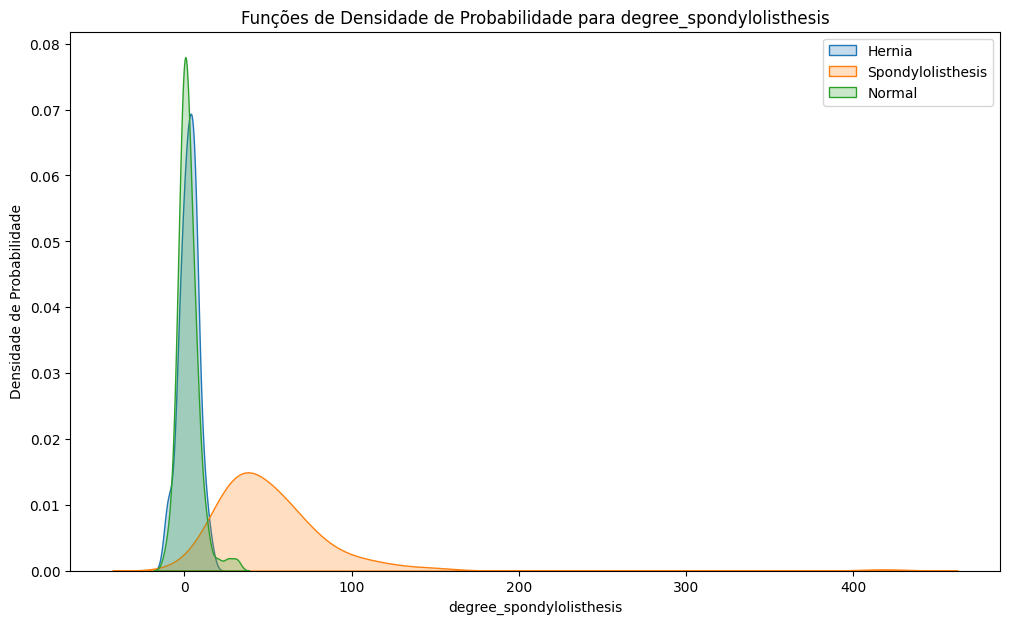

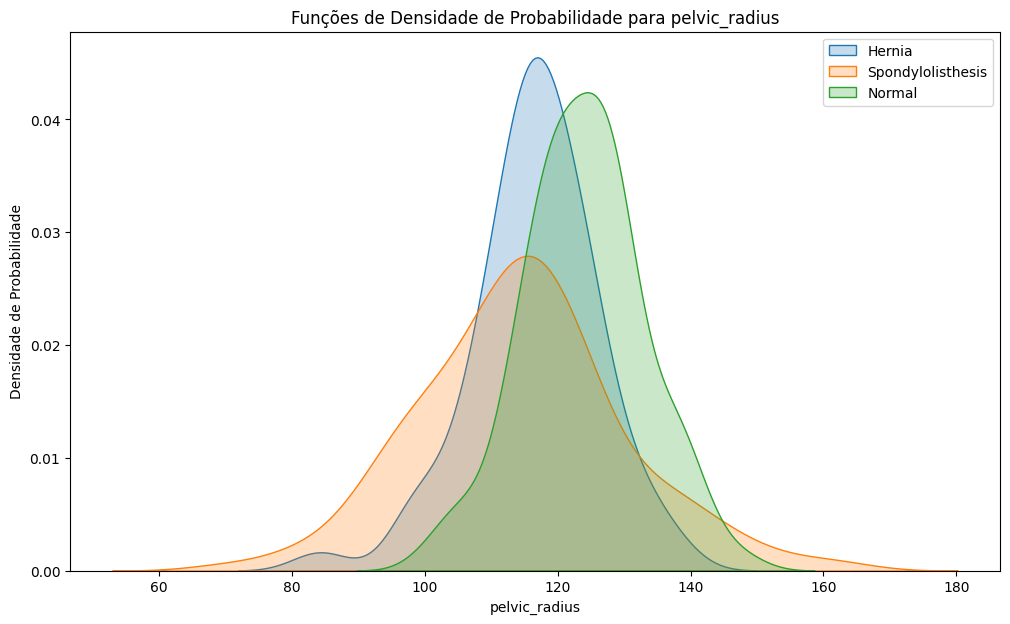

In [37]:
import seaborn as sns
import matplotlib.pyplot as plt

hernia = df[df['class'] == 'Hernia']
spondylolisthesis = df[df['class'] == 'Spondylolisthesis']
normal = df[df['class'] == 'Normal']

#Graphic1
plt.figure(figsize=(12,7))
sns.kdeplot(hernia['degree_spondylolisthesis'], label= 'Hernia', fill = True)
sns.kdeplot(spondylolisthesis['degree_spondylolisthesis'], label= 'Spondylolisthesis', fill = True)
sns.kdeplot(normal['degree_spondylolisthesis'], label= 'Normal', fill = True)
plt.xlabel('degree_spondylolisthesis')
plt.ylabel('Densidade de Probabilidade')
plt.legend()
plt.title('Funções de Densidade de Probabilidade para degree_spondylolisthesis')
plt.show()

#Graphic2
plt.figure(figsize=(12,7))
sns.kdeplot(hernia['pelvic_radius'], label= 'Hernia', fill = True)
sns.kdeplot(spondylolisthesis['pelvic_radius'], label= 'Spondylolisthesis', fill = True)
sns.kdeplot(normal['pelvic_radius'], label= 'Normal', fill = True)
plt.xlabel('pelvic_radius')
plt.ylabel('Densidade de Probabilidade')
plt.legend()
plt.title('Funções de Densidade de Probabilidade para pelvic_radius')
plt.show()

**Question 2**

Split the dataset into training and testing samples. Evaluate the accuracy of the tree for different depths. Each depth is run 10 times.

In [38]:
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier


depth_limits = [1, 2, 3, 4, 5, 6, 8, 10]

variables_train, variables_test, target_train, target_test= train_test_split(variables, target, 
                                                                             train_size=0.7, stratify=target, random_state=0)

final_acc1, final_acc2 = np.array([]), np.array([])
std1, std2 = np.array([]), np.array([])

for depth in depth_limits:
    acc_folder1, acc_folder2 = np.array([]), np.array([])
    for i in range(10):
        tree2 = DecisionTreeClassifier(criterion='gini', max_depth=depth)
        tree2.fit(variables_train, target_train)
        
        y_pred1 = tree2.predict(variables_test)
        y_pred2 = tree2.predict(variables_train)
        
        acc_folder2 = np.append(acc_folder2, round(metrics.accuracy_score(target_train, y_pred2),2))
        acc_folder1 = np.append(acc_folder1, round(metrics.accuracy_score(target_test, y_pred1),2))
    
    final_acc1 = np.append(final_acc1, np.mean(np.array(acc_folder1)))
    final_acc2 = np.append(final_acc2, np.mean(np.array(acc_folder2)))
    std1 =np.append(std1, np.std(acc_folder1))
    std2 =np.append(std2, np.std(acc_folder2))
    
print("accuracy test list:", final_acc1)
print("accuracy train list:", final_acc2)

accuracy test list: [0.75  0.78  0.78  0.856 0.855 0.832 0.82  0.826]
accuracy train list: [0.78 0.84 0.85 0.9  0.93 0.97 1.   1.  ]


The accuracy lists contain the average accuracy of the 10 trees for each depth.

Within the for loop, the mean and standard deviation were calculated to plot the graphs with error bars.

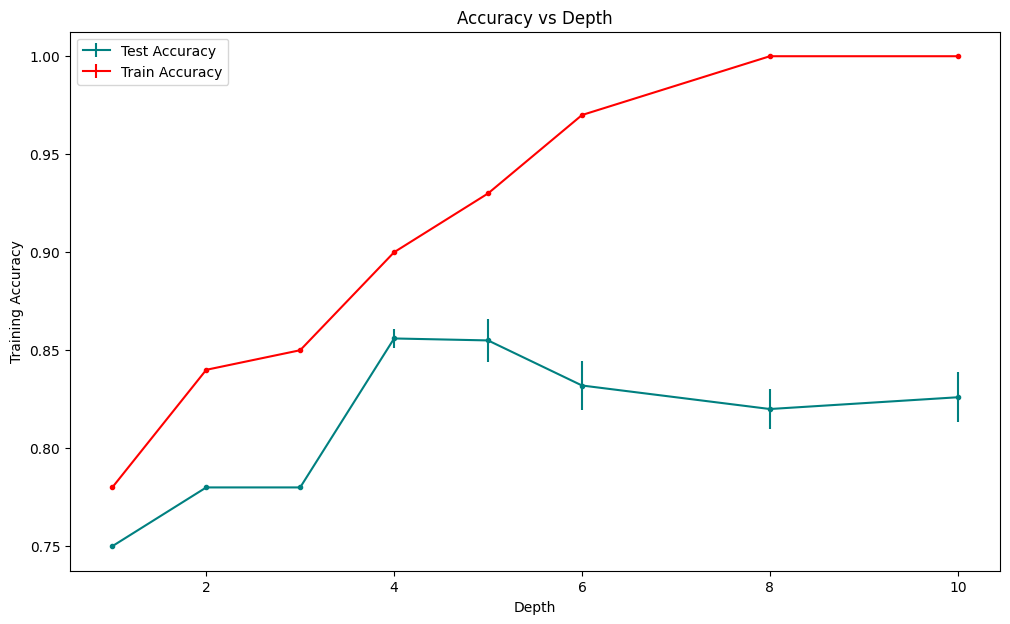

In [39]:
#Graphics
plt.figure(figsize=(12,7))
plt.errorbar(depth_limits, final_acc1, yerr=std1, label='Test Accuracy', color='#008080')
plt.errorbar(depth_limits, final_acc2, yerr=std2, label='Train Accuracy', color='red')
plt.plot(depth_limits, final_acc1, 'o', color='#008080', markersize=3)
plt.plot(depth_limits, final_acc2, 'o', color='red', markersize=3)
plt.title("Accuracy vs Depth")
plt.ylabel("Training Accuracy")
plt.xlabel("Depth")
plt.legend(loc='upper left', bbox_to_anchor=(0.0, 1.0)) #move the legend to the left
plt.show() 

**Question 3**

Through the graph, we can conclude that the training accuracy consistently increases with the depth, while the test accuracy grows until it reaches a maximum, after which it decreases, as expected due to overfitting. This indicates that the model is overly fitting the training data and not generalizing well. Therefore, the best depth to use would be around the point of maximum test accuracy, which is approximately four. Additionally, we observe that the standard deviation significantly increases at points where overfitting occurs, as expected due to the higher variation in accuracy for models that are too specific.

**Question 4**

a)

Create the tree with "random_state=0" and a minimum of 20 observations per leaf to avoid overfitting, train it with the entire sample, and finally, visualize it.

accuracy: 0.88


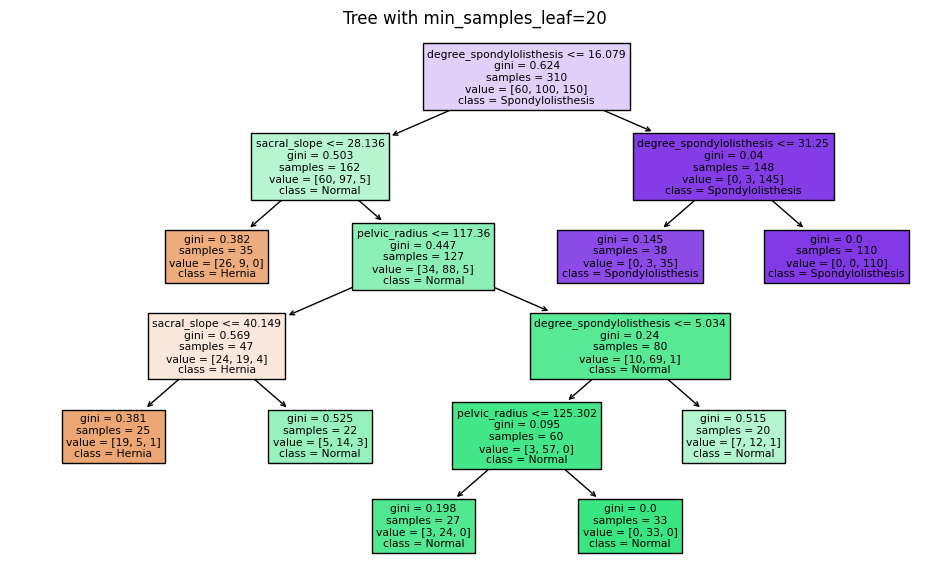

In [40]:
from sklearn import tree

tree4 = DecisionTreeClassifier(criterion='gini', min_samples_leaf=20, random_state=0)
tree4.fit(variables, target)
target_pred = tree4.predict(variables)

print('accuracy:', round(metrics.accuracy_score(target, target_pred), 2))

plt.figure(figsize=(12,7))
tree.plot_tree(tree4, filled=True, feature_names=variables.columns, class_names=tree4.classes_)
plt.title("Tree with min_samples_leaf=20")
plt.show()

**Question 4**

b)

There are two paths that the tree can take to classify an instance as Hernia.

Both paths converge at the first node that the tree selects when the value of degree_spondylolisthesis is less than or equal to 16.079. Subsequently, if the value of sacral_slope is less than or equal to 28.136, the tree classifies the instance as Hernia.

The second path occurs when, after the first node, sacral_slope is greater than 28.136. In this case, if pelvic_radius is less than 117.36, and within those values, sacral_slope is less than 40.149, the instance is also classified as Hernia.